In [ ]:
# Step 1: Import Required Libraries

from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Path to zip file in Google Drive
zip_path = '/content/drive/MyDrive/ChestXRay2017.zip'
extract_to = '/content/dataset/'

# Extract the zip file
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("Extraction complete!")
except zipfile.BadZipFile:
    print("Error: Corrupt zip file. Please re-upload.")

Extraction complete!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
img_height, img_width = 150, 150
batch_size = 32

# Data Augmentation for Training (with validation split)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use only 20% of the data
)

test_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.5)  # Rescale and split test data

# Paths to Train and Test Datasets
train_path = '/content/dataset/chest_xray/train/'
test_path = '/content/dataset/chest_xray/test/'

# Create Data Generators using only 50% of the data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # 50% of the data for training
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # 50% of the test data
)

# Check class indices
print(train_generator.class_indices)


Found 4187 images belonging to 2 classes.
Found 312 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
# Verify extraction
import os
print(os.listdir(extract_to))

['__MACOSX', 'chest_xray']


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(train_generator,epochs=5)


Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.7627 - loss: 0.5314
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.8919 - loss: 0.2698
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.9086 - loss: 0.2371
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.9089 - loss: 0.2259
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.9171 - loss: 0.2193


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 768ms/step - accuracy: 0.8534 - loss: 0.3292
Test Accuracy: 86.54%


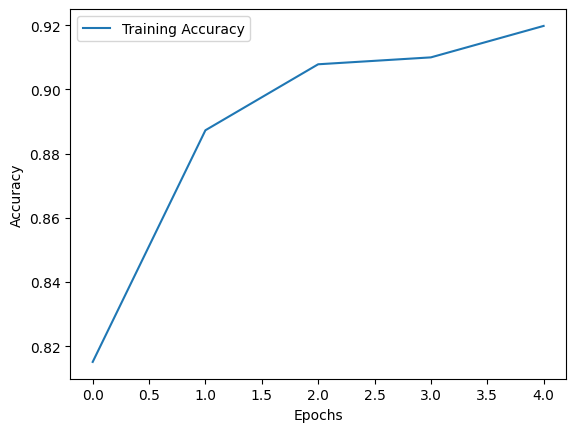

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload a test image to Colab or Drive
img_path = '/content/dataset/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'

# Preprocess the image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make Prediction
prediction = model.predict(img_array)
print("Pneumonia Detected" if prediction[0] > 0.5 else "Normal X-ray")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Pneumonia Detected
